In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [2]:
# 같은 폴더에 mnist.npz 다운 받기
# https://s3.amazonaws.com/img-datasets/mnist.npz
# MNIST 데이터 불러오기
#(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
import numpy as np
path = './mnist.npz'
with np.load(path, allow_pickle=True) as f:
    X_train, Y_train = f['x_train'], f['y_train']
    X_test, Y_test = f['x_test'], f['y_test']

In [3]:
# # 데이터 불러오기
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape[0]

60000

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [6]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
%%time

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.05366, saving model to ./model/01-0.0537.hdf5
300/300 - 34s - loss: 0.2648 - accuracy: 0.9197 - val_loss: 0.0537 - val_accuracy: 0.9824 - 34s/epoch - 113ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.05366 to 0.03882, saving model to ./model/02-0.0388.hdf5
300/300 - 34s - loss: 0.0872 - accuracy: 0.9743 - val_loss: 0.0388 - val_accuracy: 0.9861 - 34s/epoch - 112ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03882 to 0.03568, saving model to ./model/03-0.0357.hdf5
300/300 - 32s - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.0357 - val_accuracy: 0.9881 - 32s/epoch - 108ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.03568 to 0.03494, saving model to ./model/04-0.0349.hdf5
300/300 - 37s - loss: 0.0539 - accuracy: 0.9829 - val_loss: 0.0349 - val_accuracy: 0.9882 - 37s/epoch - 124ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.03494
300/300 - 37s - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0370 - val_

In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.0304 - accuracy: 0.9909

 Test Accuracy: 0.9909


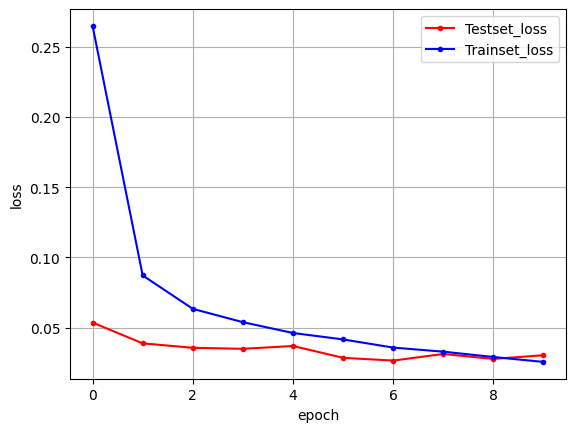

In [10]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss'] # 검증셋 loss

# 학습셋의 오차
y_loss = history.history['loss']  # 학습셋 loss

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()